## Accurate results in the simulation of the 2 coupled reactions `2 S <-> U` and `S <-> X`   
Both mostly forward.  1st-order kinetics throughout.   

Same as `variable_steps_1`, but with FIXED TIME STEPS: a lot of TINY steps - as a proxy for the "exact value"

LAST REVISED: June 23, 2024 (using v. 1.0 beta34.1)

In [1]:
import set_path      # Importing this module will add the project's home directory to sys.path

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from experiments.get_notebook_info import get_notebook_basename

from life123 import ChemData as chem
from life123 import UniformCompartment

from life123 import GraphicLog

In [3]:
# Initialize the HTML logging
log_file = get_notebook_basename() + ".log.htm"    # Use the notebook base filename for the log file

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_cytoscape_2"],
                  extra_js="https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.21.2/cytoscape.umd.js")

-> Output will be LOGGED into the file 'variable_steps_2.log.htm'


### Initialize the system

In [4]:
# Initialize the system
chem_data = chem(names=["U", "X", "S"])

# Reaction 2 S <-> U , with 1st-order kinetics for all species (mostly forward)
chem_data.add_reaction(reactants=[(2, "S", 1)], products="U",
                       forward_rate=8., reverse_rate=2.)

# Reaction S <-> X , with 1st-order kinetics for all species (mostly forward)
chem_data.add_reaction(reactants="S", products="X",
                       forward_rate=6., reverse_rate=3.)

chem_data.describe_reactions()

# Send the plot of the reaction network to the HTML log file
chem_data.plot_reaction_network("vue_cytoscape_2")

Number of reactions: 2 (at temp. 25 C)
0: 2 S <-> U  (kF = 8 / kR = 2 / delta_G = -3,436.6 / K = 4) | 1st order in all reactants & products
1: S <-> X  (kF = 6 / kR = 3 / delta_G = -1,718.3 / K = 2) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {'X', 'U', 'S'}
[GRAPHIC ELEMENT SENT TO LOG FILE `variable_steps_2.log.htm`]


### Set the initial concentrations of all the chemicals

In [5]:
dynamics = UniformCompartment(chem_data=chem_data)
dynamics.set_conc(conc={"U": 50., "X": 100.})
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
3 species:
  Species 0 (U). Conc: 50.0
  Species 1 (X). Conc: 100.0
  Species 2 (S). Conc: 0.0
Set of chemicals involved in reactions: {'X', 'U', 'S'}


In [6]:
dynamics.set_diagnostics()       # To save diagnostic information about the call to single_compartment_react()

dynamics.single_compartment_react(initial_step=0.0001, target_end_time=0.35, 
                                  variable_steps=False)

df = dynamics.get_history()
df

3500 total step(s) taken


SYSTEM TIME          U           X          S            caption
0          0.0000  50.000000  100.000000   0.000000  Initialized state
1          0.0001  49.990000   99.970000   0.050000                   
2          0.0002  49.980042   99.940039   0.099877                   
3          0.0003  49.970126   99.910117   0.149631                   
4          0.0004  49.960252   99.880234   0.199263                   
...           ...        ...         ...        ...                ...
3496       0.3496  61.042146   58.689164  19.226544                   
3497       0.3497  61.045319   58.683094  19.226269                   
3498       0.3498  61.048490   58.677024  19.225995                   
3499       0.3499  61.051662   58.670957  19.225720                   
3500       0.3500  61.054832   58.664891  19.225445                   

[3501 rows x 5 columns]

In [7]:
dynamics.explain_time_advance()

From time 0 to 0.35, in 3500 steps of 0.0001
(3500 steps total)


### Look up some values

In [8]:
df.iloc[400]

SYSTEM TIME         0.04
U              48.449494
X              90.386964
S              12.714047
caption                 
Name: 400, dtype: object

In [9]:
df.iloc[1850]

SYSTEM TIME        0.185
U              54.529071
X              71.351769
S              19.590088
caption                 
Name: 1850, dtype: object

## Plots of changes of concentration with time

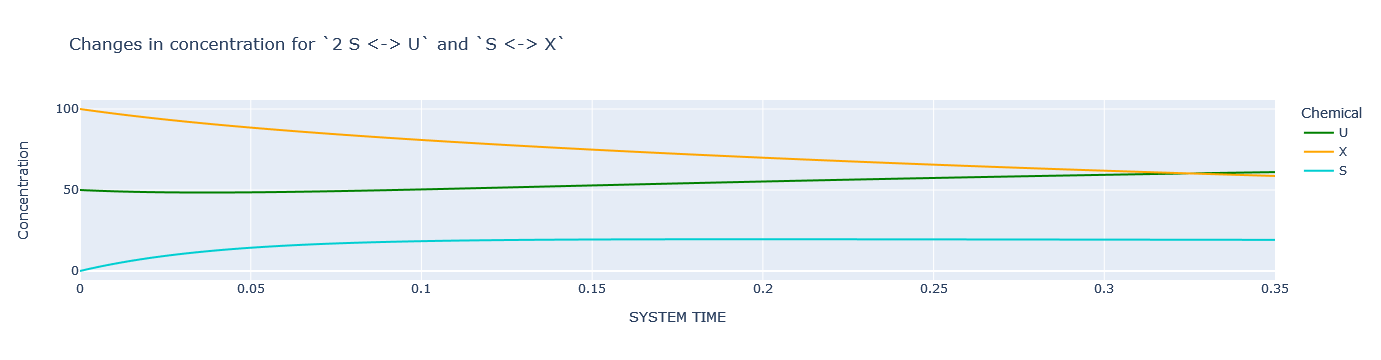

In [10]:
dynamics.plot_history(colors=['green', 'orange', 'darkturquoise'])

In [11]:
dynamics.curve_intersect("U", "X", t_start=0.3, t_end=0.35)

(0.3249894990583167, 60.23478689917821)